****What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features
        (variables) from a dataset to improve a machine learning model's 
        performance and efficiency. Instead of using all the features, we 
        select only the most relevant ones that contribute significantly 
        to predictions.


**Why Do We Need Feature Selection?**
*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.
*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.


**Types of Feature Selection Methods**
<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.

<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.

<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
data=pd.DataFrame({
    'Size':np.random.randint(1000,5000,100),
    'Bedrooms':np.random.randint(1,5,100),
    'Age':np.random.randint(1,50,100),
    'Price':np.random.randint(100000,500000,100)
})

In [3]:
data.head()

,Size,Bedrooms,Age,Price
0,4174,2,32,486393
1,4507,2,39,134754
2,1860,4,49,326814
3,2294,2,32,337714
4,2130,2,4,242483


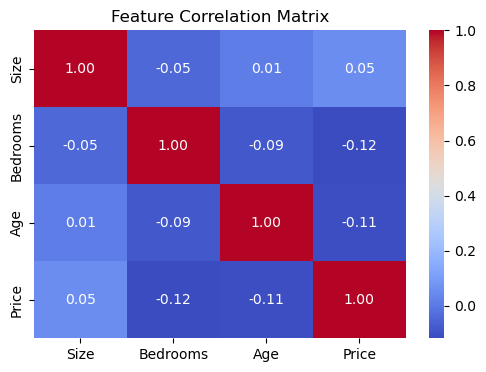

In [4]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()
#compute correlation to see how the features relate to the target.

In [5]:
#Recursive Feature Elimination(Wrapper method)
X=data.drop(columns=['Price'])
y=data['Price']
model=RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
X_selected=rfe.fit_transform(X,y)
print("Selected Features using RFE:",X.columns[rfe.support_])

#Apply RFE(Wrapper method) to select the top 2 important features

Selected Features using RFE: Index(['Size', 'Age'], dtype='object')


In [7]:
#Step:4 Apply lasso regression(Embedded method)
lasso=Lasso(alpha=0.1)
lasso.fit(X,y)
importance=np.abs(lasso.coef_)
selected_features=X.columns[importance >0]
print("Selected features using Lasso:",selected_features)

#Apply lasso regression to eliminate irrelevant features

Selected features using Lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')


In [9]:
#Extract Date & Time Features 
import pandas as pd 
#Sample dataset 
df = pd.DataFrame({'TransactionDate':pd.to_datetime(['2025-02-05 14:38:00', '2025-02-06 18:45:00'])}) 
# Extract date-related features 
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek   #Monday, Sunday=6 
df ['Hour']=df['TransactionDate'].dt.hour #Extract hour 
df ['IsWeekend']=df['DayOfWeek'].apply(lambda x: 1 if x==5 else 0) #Weekend flag 
print(df) 
#iwhy? Helps capture behavioral trends (e.g., shopping habits on weekends vs. weekdays).

      TransactionDate  DayOfWeek  Hour  IsWeekend
0 2025-02-05 14:38:00          2    14          0
1 2025-02-06 18:45:00          3    18          0


In [10]:
df_transactions=pd.DataFrame({
    'UserID':[101,102,101,103,102],
    'TransactionAmount':[500,300,700,1000,400]
})
df_user_avg=df_transactions.groupby('UserID')['TransactionAmount'].mean().reset_index()
df_user_avg.rename(columns={'TransactionAmount':'AvgTransactionAmount'},inplace=True)
print(df_user_avg)

   UserID  AvgTransactionAmount
0     101                 600.0
1     102                 350.0
2     103                1000.0


In [12]:
#Encoding Categorical Variables 
#Convert Product Category (Electronics, Clothing) into numerical form: 
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
df = pd.DataFrame({'ProductCategory': ["Electronics", "Clothing", "Clothing", "Grocery"]})
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[['ProductCategory']])
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ProductCategory']))
print(df_encoded)

#Why? Converts non-numeric categories into a format suitable for ML models.

   ProductCategory_Clothing  ProductCategory_Electronics  \
0                       0.0                          1.0   
1                       1.0                          0.0   
2                       1.0                          0.0   
3                       0.0                          0.0   

   ProductCategory_Grocery  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  


In [13]:
import numpy as np
df=pd.DataFrame({'TransactionAmount':[100,200,5000,10000,20000]})
df['LogTransactionAmount']=np.log1p(df['TransactionAmount'])
print(df)

   TransactionAmount  LogTransactionAmount
0                100              4.615121
1                200              5.303305
2               5000              8.517393
3              10000              9.210440
4              20000              9.903538


In [14]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
df['NormalizedTransactionAmount']=scaler.fit_transform(df[['TransactionAmount']])
standard_scaler=StandardScaler()
df['StandardizedTransactionAmount']=standard_scaler.fit_transform(df[['TransactionAmount']])
print(df)

   TransactionAmount  LogTransactionAmount  NormalizedTransactionAmount  \
0                100              4.615121                     0.000000   
1                200              5.303305                     0.005025   
2               5000              8.517393                     0.246231   
3              10000              9.210440                     0.497487   
4              20000              9.903538                     1.000000   

   StandardizedTransactionAmount  
0                      -0.937070  
1                      -0.923606  
2                      -0.277351  
3                       0.395831  
4                       1.742196  


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("C:\\Users\\CVR\\Downloads\\flight_price(Sheet1).csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [18]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [20]:
data.shape

(10683, 11)

In [21]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [22]:
data['Date']=data['Date_of_Journey'].str.split('/').str[0]
data['Month']=data['Date_of_Journey'].str.split('/').str[1]
data['Year']=data['Date_of_Journey'].str.split('/').str[2]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [25]:
data['Date']=data['Date'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [28]:
data.drop('Date_of_Journey',axis=1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [29]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [31]:
data['Arrival_Time']=data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [32]:
data['Arrival_hour']=data['Arrival_Time'].str.split(':').str[0]
data['Arrival_min']=data['Arrival_Time'].str.split(':').str[1]

In [34]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [35]:
data['Departure_hour']=data['Dep_Time'].str.split(':').str[0]
data['Departure_min']=data['Dep_Time'].str.split(':').str[1]

In [37]:
data['Departure_hour']=data['Departure_hour'].astype(int)
data['Departure_min']=data['Departure_min'].astype(int)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
 14  Arrival_hour     10683 non-null  object
 15  Arrival_min      10683 non-null  object
 16  Departure_hour   10683 non-null  int32 
 17  Departure_min    10683 non-null

In [40]:
data.drop('Dep_Time',axis=1,inplace=True)

In [41]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [42]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [43]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [44]:
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [45]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min


In [46]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,01:10,2h 50m,0,No info,3897,24,3,2019,01,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
